## Ising Spin Chain

$\displaystyle H = J\sum_n^{N-1} \sigma_x(n) \sigma_x(n+1)$



In [2]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

In [63]:
def integrate(N, J, psi0, tlist, kappa):
    
    #operators
    si = qeye(2)
    sx = sigmax()
    sz = sigmaz()
    
    si_list = []
    sx_list = []
    sz_list = []
    
    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)
        
        si_list.append(tensor(op_list))
        
        op_list[n] = sx
        sx_list.append(tensor(op_list))
        
        op_list[n] = sz
        sz_list.append(tensor(op_list))
    
    #Construct the hamiltonian
    H = 0
    #Interaction terms
    for n in range(N-1):
        H += J * sx_list[n] * sx_list[n+1]
    
    #observable: sz_tot
    #for i in range(N):
    #    sz_tot = 0
    #    sz_tot += sz_list[i]
    
    #Environment collapse operators(Dephasing at the boundary)
    c_op_list = []
    if kappa > 0:
        c_op_list.append(np.sqrt(kappa) * sz_list[0])
        c_op_list.append(np.sqrt(kappa) * sz_list[N-1])
    
    #Monitored collapse operators(Bit flip)
    s_op_list = []
    if kappa > 0:
        for m in range(N):
            s_op_list.append(np.sqrt(kappa) * 1/2*(si_list[m] + sz_list[m]))
                     
    #Evolve and calculate expectation values
    result = smesolve(H, psi0, tlist, c_op_list, s_op_list, ntraj = 2)
        
    return result.states

In [92]:
#Set up the calculation

time_steps = 200
N = 5              #number of spins
J = 0.1              # Interaction strength 
kappa = 0.1        #cavity decay rate
tlist = np.linspace(0, 50, time_steps)

#initial state(all spins in |0>)
psi_list = []
psi_list.append(basis(2,1))
for n in range(N-1):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

#delta = 5*2*np.pi    # cavity detuning
#kappa = 2            # cavity decay rate

In [65]:
result = integrate(N, J, psi0, tlist, kappa)

50.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.65s


In [176]:
entropy_list = []
for t in range(time_steps):
    entropy = negativity(result[0][t], 0, method='tracenorm', logarithmic=False)
    entropy_list.append(entropy)
entropy0 = np.array(entropy_list)

entropy_list = []
for t in range(time_steps):
    entropy = negativity(result[0][t], 1, method='tracenorm', logarithmic=False)
    entropy_list.append(entropy)
entropy1 = np.array(entropy_list)

entropy_list = []
for t in range(time_steps):
    entropy = negativity(result[0][t], 2, method='tracenorm', logarithmic=False)
    entropy_list.append(entropy)
entropy2 = np.array(entropy_list)

entropy_list = []
for t in range(time_steps):
    entropy = negativity(result[0][t], 3, method='tracenorm', logarithmic=False)
    entropy_list.append(entropy)
entropy3 = np.array(entropy_list)

entropy_list = []
for t in range(time_steps):
    entropy = negativity(result[0][t], 4, method='tracenorm', logarithmic=False)
    entropy_list.append(entropy)
entropy4 = np.array(entropy_list)

entropy_list = []
for t in range(time_steps):
    entropy = negativity(result[0][t], 5, method='tracenorm', logarithmic=False)
    entropy_list.append(entropy)
entropy5 = np.array(entropy_list)

entropy_list = []
for t in range(time_steps):
    entropy = negativity(result[0][t], 6, method='tracenorm', logarithmic=False)
    entropy_list.append(entropy)
entropy6 = np.array(entropy_list)

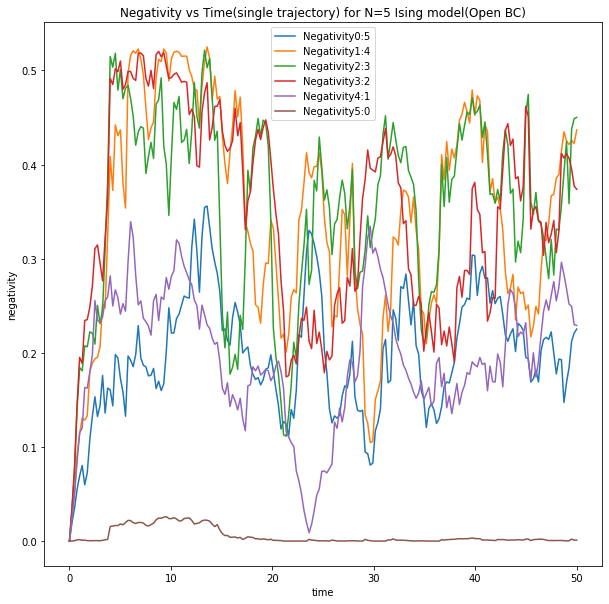

In [177]:
fig = plt.figure(figsize=(10, 10))

plt.plot(tlist, entropy0, label = "Negativity0:5")
plt.plot(tlist, entropy1, label = "Negativity1:4")
plt.plot(tlist, entropy2, label = "Negativity2:3")    
plt.plot(tlist, entropy3, label = "Negativity3:2")    
plt.plot(tlist, entropy4, label = "Negativity4:1")    
plt.plot(tlist, entropy5, label = "Negativity5:0")    


plt.xlabel("time")
plt.ylabel("negativity")

plt.title("Negativity vs Time(single trajectory) for N=5 Ising model(Open BC)")

plt.legend()
plt.show()